## UTS

In [14]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Masukan Data

In [15]:
import numpy as np
import pandas as pd

In [18]:
df = pd.read_excel('/content/drive/MyDrive/PROSAINDATA/lala.xlsx')
df.head()


,Nama,Judul,Abstrak,LABEL
0,A.Ubaidillah S.Kom,PERANCANGAN DAN IMPLEMENTASI SISTEM DATABASE _...,Sistem informasi akademik (SIAKAD) merupaka...,RPL
1,"M. Basith Ardianto,",APLIKASI KONTROL DAN MONITORING JARINGAN KOMPU...,Berjalannya koneksi jaringan komputer dengan l...,RPL
2,"Akhmad Suyandi, S.Kom",RANCANG BANGUN APLIKASI PROXY SERVER UNTUK_x00...,Web server adalah sebuah perangkat lunak serve...,RPL
3,Heri Supriyanto,SISTEM PENDUKUNG KEPUTUSAN OPTIMASI PENJADWALA...,Penjadwalan kuliah di Perguruan Tinggi me...,KOMPUTASI
4,Septian Rahman Hakim,SISTEM AUGMENTED REALITY ANIMASI BENDA BERGERA...,Seiring perkembangan teknologi yang ada diduni...,RPL


### Mengeksplor Data

In [ ]:
df.isnull().sum()

Nama       0
Judul      0
Abstrak    0
LABEL      0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()


Nama       0
Judul      0
Abstrak    0
LABEL      0
dtype: int64

In [ ]:
df.count()


Nama       828
Judul      828
Abstrak    828
LABEL      828
dtype: int64

In [ ]:
# Membalikkan Data
df.tail()


,Nama,Judul,Abstrak,LABEL
823,Rachmad Agung Pambudi,PENERAPAN ALGORITMA LONG-SHORT TERM MEMORY UNT...,Investasi saham selama ini memiliki resiko ker...,KOMPUTASI
824,Nadila Hidayanti,SISTEM PENCARIAN TEKS AL-QURAN TERJEMAHAN BERB...,Information Retrieval (IR) merupakan pengambil...,RPL
825,Afni Sakinah,KLASIFIKASI KOMPLEKSITAS VISUAL CITRA SAMPAH M...,Klasifikasi citra merupakan proses pengelompok...,KOMPUTASI
826,Friska Fatmawatiningrum,IDENTIFIKASI BINER ATRIBUT PEJALAN KAKI MENGGU...,Identifikasi atribut pejalan kaki merupakan sa...,KOMPUTASI
827,Dian Wibowo,DETEKSI OBJEK MANUSIA BERBASIS ONE STAGE DETEC...,Topik deteksi objek telah menarik perhatian ya...,KOMPUTASI


In [ ]:
# Jumlah data pada masing-masing label KBK
df['LABEL'].value_counts()

KOMPUTASI    500
RPL          328
Name: LABEL, dtype: int64

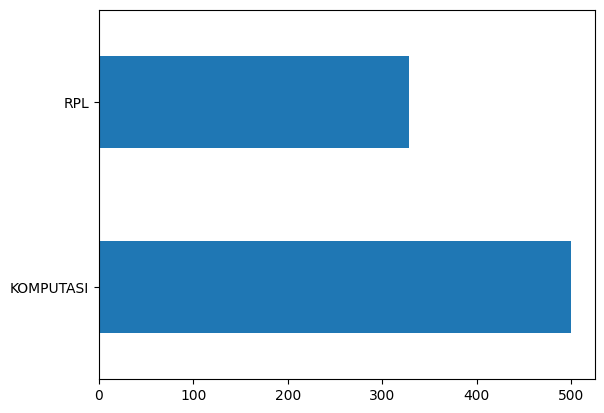

In [ ]:
import matplotlib.pyplot as plt

df['LABEL'].value_counts().plot(kind='barh')
plt.show()

### TEKS PROSESING

#### Text Cleaning

In [ ]:
import re, string

# Text Cleaning
def cleaning(text):
    # HTML Tag Removal
    text = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});').sub('', str(text))

    # Case folding
    text = text.lower()

    # Trim text
    text = text.strip()

    # Remove punctuations, karakter spesial, and spasi ganda
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)

    # Number removal
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
    text = re.sub(r'\d', ' ', text)
    text = re.sub(r'\s+', ' ', text)

    # Mengubah text 'nan' dengan whitespace agar nantinya dapat dihapus
    text = re.sub('nan', '', text)

    return text

In [ ]:

df['Judul'] = df['Judul'].apply(lambda x: cleaning(x))
df['Abstrak'] = df['Abstrak'].apply(lambda x: cleaning(x))

df.head()

,Nama,Judul,Abstrak,LABEL
0,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database x...,sistem informasi akademik siakad merupakan sis...,RPL
1,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL
2,"Akhmad Suyandi, S.Kom",rancang bangun aplikasi proxy server untuk x d...,web server adalah sebuah perangkat lunak serve...,RPL
3,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,KOMPUTASI
4,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,RPL


In [ ]:
# Checkpoint: Export Hasil Text Cleaning
df.to_csv('lala-cleaning.csv')

#### Remove Missing Values

In [ ]:
# Ubah empty string menjadi NaN value
df = df.replace('', np.nan)

In [ ]:
# Cek missing values
df.isnull().sum()

Nama       0
Judul      1
Abstrak    5
LABEL      0
dtype: int64

In [ ]:
# Remove missing values
df.dropna(inplace=True)

In [ ]:
df.isnull().sum()

Nama       0
Judul      0
Abstrak    0
LABEL      0
dtype: int64

In [ ]:
len(df)

823

#### Remove Duplicate Values

In [ ]:
# Cek apakah terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,Nama,Judul,Abstrak,LABEL
703,Abdul Ainur Rofik,sistem pendukung keputusan pemilihan pemain bo...,peningkatan pembinaan permai bola voli terutam...,KOMPUTASI


In [ ]:
# Remove duplicates judul
df.drop_duplicates(subset=['Judul'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom judul
df[df['Judul'].duplicated()]

,Nama,Judul,Abstrak,LABEL


In [ ]:
# Cek apakah terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,Nama,Judul,Abstrak,LABEL


In [ ]:
# Remove duplicates abstrak
df.drop_duplicates(subset=['Abstrak'], inplace=True)

# Cek apakah masih terdapat duplikasi data pada kolom abstrak
df[df['Abstrak'].duplicated()]

,Nama,Judul,Abstrak,LABEL


In [ ]:
# Checkpoint: Export Hasil Preprocessing
df.to_csv('preprocessed-pta.csv')

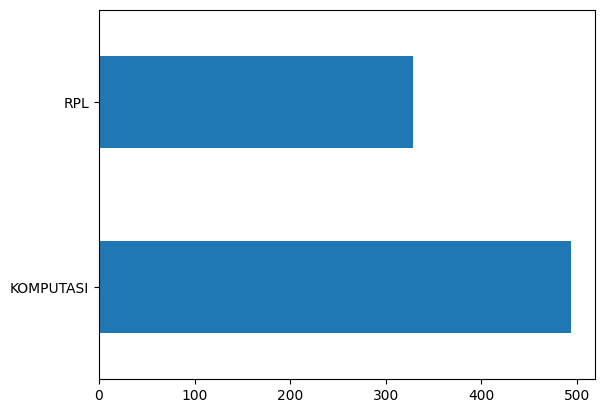

In [ ]:
# Distribusi Kelas setelah Text Preprocessing
df['LABEL'].value_counts().plot(kind='barh')
plt.show()

### TOKENIZATION

In [ ]:
import nltk
nltk.download('popular')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [ ]:
# Tokenizing Judul
df['judul_tokens'] = df['Judul'].apply(lambda x: word_tokenize(x))
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database x...,"[perancangan, dan, implementasi, sistem, datab..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, dan, monitoring, jaringan,..."
2,rancang bangun aplikasi proxy server untuk x d...,"[rancang, bangun, aplikasi, proxy, server, unt..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


In [ ]:
# Tokenizing Abstrak
df['abstrak_tokens'] = df['Abstrak'].apply(lambda x: word_tokenize(x))
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, merupaka..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, den..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, adalah, sebuah, perangkat, lunak..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, di, perguruan, tinggi, m..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, yang, ada, ..."


### Stop Words Removal

In [ ]:
from nltk.corpus import stopwords 
from itertools import chain

stop_words = set(chain(stopwords.words('indonesian'), stopwords.words('english')))

df['judul_tokens'] = df['judul_tokens'].apply(lambda x: [w for w in x if not w in stop_words])
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: [w for w in x if not w in stop_words])

In [ ]:
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database x...,"[perancangan, implementasi, sistem, database, ..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaringan, komp..."
2,rancang bangun aplikasi proxy server untuk x d...,"[rancang, bangun, aplikasi, proxy, server, x, ..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, pendukung, keputusan, optimasi, penja..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, b..."


In [ ]:
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[berjalannya, koneksi, jaringan, komputer, lan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, berfun..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[penjadwalan, kuliah, perguruan, kompleks, per..."
4,seiring perkembangan teknologi yang ada diduni...,"[seiring, perkembangan, teknologi, didunia, mu..."


### Stemming UBAH KATA KERJA JADI KATA DASAR

In [ ]:
pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 KB 8.3 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from tqdm.auto import tqdm
tqdm.pandas()

factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [ ]:
# Stemming judul
df['judul_tokens'] = df['judul_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/822 [00:00<?, ?it/s]

In [ ]:
# Hasil stemming judul
df[["Judul", "judul_tokens"]].head()

,Judul,judul_tokens
0,perancangan dan implementasi sistem database x...,"[ancang, implementasi, sistem, database, x, di..."
1,aplikasi kontrol dan monitoring jaringan kompu...,"[aplikasi, kontrol, monitoring, jaring, komput..."
2,rancang bangun aplikasi proxy server untuk x d...,"[rancang, bangun, aplikasi, proxy, server, x, ..."
3,sistem pendukung keputusan optimasi penjadwala...,"[sistem, dukung, putus, optimasi, jadwal, mata..."
4,sistem augmented reality animasi benda bergera...,"[sistem, augmented, reality, animasi, benda, g..."


In [ ]:
# Stemming abstrak
df['abstrak_tokens'] = df['abstrak_tokens'].progress_apply(lambda x: stemmer.stem(' '.join(x)).split(' '))

  0%|          | 0/822 [00:00<?, ?it/s]

In [ ]:
# Hasil stemming abstrak
df[["Abstrak", "abstrak_tokens"]].head()

,Abstrak,abstrak_tokens
0,sistem informasi akademik siakad merupakan sis...,"[sistem, informasi, akademik, siakad, sistem, ..."
1,berjalannya koneksi jaringan komputer dengan l...,"[jalan, koneksi, jaring, komputer, lancar, gan..."
2,web server adalah sebuah perangkat lunak serve...,"[web, server, perangkat, lunak, server, fungsi..."
3,penjadwalan kuliah di perguruan tinggi merupak...,"[jadwal, kuliah, guru, kompleks, masalah, vari..."
4,seiring perkembangan teknologi yang ada diduni...,"[iring, kembang, teknologi, dunia, muncul, tek..."


### Export Cleaned Data

In [ ]:
df

In [ ]:
df['judul_tokens'] = df['judul_tokens'].apply(lambda x: ' '.join(x))
df['abstrak_tokens'] = df['abstrak_tokens'].apply(lambda x: ' '.join(x))

df.to_csv('cleaned-data-lala.csv')

### KLASIFIKASI

##### Load Preprocessed Data

In [27]:
import numpy as np
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/PROSAINDATA/cleaned-data-lala.csv', index_col=0)
df.head()

,Nama,Judul,Abstrak,LABEL,judul_tokens,abstrak_tokens
0,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database x...,sistem informasi akademik siakad merupakan sis...,RPL,ancang implementasi sistem database x distribu...,sistem informasi akademik siakad sistem inform...
1,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,RPL,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,"Akhmad Suyandi, S.Kom",rancang bangun aplikasi proxy server untuk x d...,web server adalah sebuah perangkat lunak serve...,RPL,rancang bangun aplikasi proxy server x enkrips...,web server perangkat lunak server fungsi x ter...
3,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,KOMPUTASI,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
4,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,RPL,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...


In [28]:
X = df['abstrak_tokens']
y = df['LABEL']

#### Feature Extraction: TF-IDF

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
countvectorizer = CountVectorizer()
tfidfvectorizer = TfidfVectorizer()

count_wm = countvectorizer.fit_transform(X)
tfidf_wm = tfidfvectorizer.fit_transform(X)

In [30]:
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidfvectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
df_countvect


Count Vectorizer



,aalysis,aam,abad,abadi,abai,abdi,ability,abjad,absah,absensi,...,zara,zat,zcz,zf,zona,zone,zoning,zoom,zucara,zungu
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
818,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
819,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
820,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### PCA

In [7]:
tfidf_wm.shape

(822, 6122)

In [31]:
# Impor library yang dibutuhkan
from sklearn.decomposition import PCA

# Inisialisasi objek PCA dengan 3 komponen
pca = PCA(n_components=3)

# Melakukan fit transform pada data
X_pca = pca.fit_transform(tfidf_wm.toarray())

In [32]:
X_pca.shape

(822, 3)

#### Split Data

In [ ]:
from sklearn.model_selection import train_test_split
training, test = train_test_split(X_pca,test_size=0.2, random_state=1)#Nilai X training dan Nilai X testing
training_label, test_label = train_test_split(y, test_size=0.2, random_state=1)#Nilai Y training dan Nilai Y testing

#### K-Means

In [33]:
# Ubah Data Label Menjadi Angka
df['LABEL'] = pd.Categorical(df["LABEL"])
df["LABEL"] = df["LABEL"].cat.codes
df

,Nama,Judul,Abstrak,LABEL,judul_tokens,abstrak_tokens
0,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database x...,sistem informasi akademik siakad merupakan sis...,1,ancang implementasi sistem database x distribu...,sistem informasi akademik siakad sistem inform...
1,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,1,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,"Akhmad Suyandi, S.Kom",rancang bangun aplikasi proxy server untuk x d...,web server adalah sebuah perangkat lunak serve...,1,rancang bangun aplikasi proxy server x enkrips...,web server perangkat lunak server fungsi x ter...
3,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,0,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
4,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,1,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
...,...,...,...,...,...,...
823,Rachmad Agung Pambudi,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,0,terap algoritma long short term memory prediks...,investasi saham milik resiko rugi gera harga s...
824,Nadila Hidayanti,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,1,sistem cari teks al quran terjemah bahasa indo...,information retrieval ir ambil informasi simpa...
825,Afni Sakinah,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,0,klasifikasi kompleksitas visual citra sampah k...,klasifikasi citra proses kelompok piksel citra...
826,Friska Fatmawatiningrum,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,0,identifikasi biner atribut pejal kaki adaptive...,identifikasi atribut pejal kaki salah teliti k...


In [42]:
Y = df["LABEL"]
df_without_label = df.drop(columns=["LABEL"])
df_without_label

,Nama,Judul,Abstrak,judul_tokens,abstrak_tokens
0,A.Ubaidillah S.Kom,perancangan dan implementasi sistem database x...,sistem informasi akademik siakad merupakan sis...,ancang implementasi sistem database x distribu...,sistem informasi akademik siakad sistem inform...
1,"M. Basith Ardianto,",aplikasi kontrol dan monitoring jaringan kompu...,berjalannya koneksi jaringan komputer dengan l...,aplikasi kontrol monitoring jaring komputer ba...,jalan koneksi jaring komputer lancar ganggu ha...
2,"Akhmad Suyandi, S.Kom",rancang bangun aplikasi proxy server untuk x d...,web server adalah sebuah perangkat lunak serve...,rancang bangun aplikasi proxy server x enkrips...,web server perangkat lunak server fungsi x ter...
3,Heri Supriyanto,sistem pendukung keputusan optimasi penjadwala...,penjadwalan kuliah di perguruan tinggi merupak...,sistem dukung putus optimasi jadwal matakuliah...,jadwal kuliah guru kompleks masalah variabel t...
4,Septian Rahman Hakim,sistem augmented reality animasi benda bergera...,seiring perkembangan teknologi yang ada diduni...,sistem augmented reality animasi benda gerak f...,iring kembang teknologi dunia muncul teknologi...
...,...,...,...,...,...
823,Rachmad Agung Pambudi,penerapan algoritma long short term memory unt...,investasi saham selama ini memiliki resiko ker...,terap algoritma long short term memory prediks...,investasi saham milik resiko rugi gera harga s...
824,Nadila Hidayanti,sistem pencarian teks al quran terjemahan berb...,information retrieval ir merupakan pengambilan...,sistem cari teks al quran terjemah bahasa indo...,information retrieval ir ambil informasi simpa...
825,Afni Sakinah,klasifikasi kompleksitas visual citra sampah m...,klasifikasi citra merupakan proses pengelompok...,klasifikasi kompleksitas visual citra sampah k...,klasifikasi citra proses kelompok piksel citra...
826,Friska Fatmawatiningrum,identifikasi biner atribut pejalan kaki menggu...,identifikasi atribut pejalan kaki merupakan sa...,identifikasi biner atribut pejal kaki adaptive...,identifikasi atribut pejal kaki salah teliti k...


In [44]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X_pca)
# Getting the cluster labels
labels = kmeans.predict(X_pca)
# Centroid values
centroids = kmeans.cluster_centers_
hasil = kmeans.fit_transform(X_pca)
hasil

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[0.07059278, 0.39755532, 0.39200843],
       [0.03282646, 0.36471566, 0.32254007],
       [0.06222831, 0.36967524, 0.30650127],
       ...,
       [0.29561781, 0.09846814, 0.46399297],
       [0.14639601, 0.23101247, 0.36946733],
       [0.11829682, 0.26539276, 0.36469372]])

In [45]:
labels
if(labels[1] == 0):
    print(labels)
elif labels[57] ==2:
  # print(labels)
  mapping = {0:2, 1:0, 2:1}
  a = [mapping[i] for i in labels]
  print(a,end='')
elif labels[1]==1:
  mapping = {0:1, 1:0, 2:2}
  a = [mapping[i] for i in labels]
  print(a,end='')

[0 0 0 0 0 0 2 1 2 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 2 0 0 0 0 0 1
 0 1 0 0 0 0 0 2 0 1 1 0 2 2 0 2 0 0 0 0 1 0 0 1 0 0 2 0 0 0 0 0 0 0 0 1 0
 0 0 0 2 0 0 2 0 0 2 0 2 0 0 0 1 2 1 0 0 0 1 2 1 0 0 0 0 0 2 2 1 0 0 2 1 1
 0 2 1 0 0 0 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 2 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 0 0 0 0 0 1 0 2 2 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 1 0 0 2 0 0 1 1 1 1 0 2 2 0 0 0 0 2 0 2 0 0 0 1 1 1 1 1 1 0 2 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 2 0 0 2 1 0 2 1 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 1 1 1 2 2 1 0 0 1 0 0 2 0 0 0 0 2 0 2 1 0 0
 0 0 0 0 1 0 2 1 0 0 2 0 1 0 0 0 0 0 0 0 0 0 0 0 0 2 2 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 1 1 0 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 2 0 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 2 2 0 0 0 0 2 2 2 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 2 1 2 0 0 0 0 0 0 1 0 1 0 1 2 0 2 0 1 1 1 0 2 0 0 0 0 0
 0 0 0 2 0 0 2 0 1 0 0 0 0 2 2 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 2 0 0 1 0 1
 0 0 0 0 0 2 0 0 0 0 0 0 

In [53]:
# menentukan 
scores = []
for i in range(1,16):
  # Run PCA over the features.
  pca = PCA(n_components=i)
  X = pca.fit_transform(tfidf_wm.toarray())
  # Number of clusters
  kmeans = KMeans(n_clusters=2)
  # Fitting the input data
  kmeans = kmeans.fit(X)
  # Getting the cluster labels
  labels = kmeans.predict(X)
  # Centroid values
  centroids = kmeans.cluster_centers_
  hasil = kmeans.fit_transform(X)
  acc = accuracy_score(y, labels)
  scores.append(acc)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

In [54]:
scores

[0.5182481751824818,
 0.5182481751824818,
 0.5182481751824818,
 0.5231143552311436,
 0.5231143552311436,
 0.4768856447688564,
 0.5231143552311436,
 0.5231143552311436,
 0.5231143552311436,
 0.4768856447688564,
 0.4781021897810219,
 0.5218978102189781,
 0.5218978102189781,
 0.4781021897810219,
 0.5218978102189781]

Text(0, 0.5, 'Testing Accuracy')

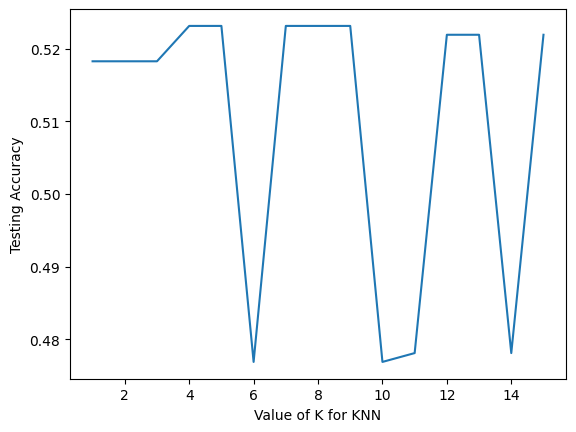

In [56]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(range(1,16),scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

#### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

modelKNN = KNeighborsClassifier(n_neighbors=2)
modelKNN.fit(training, training_label)

KNeighborsClassifier(n_neighbors=2)

In [ ]:
test_pred = modelKNN.predict(test)
test_pred

array(['KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'RPL', 'KOMPUTASI', 'KOMPUTASI', 

In [ ]:
accuracy_score(test_label, test_pred)

0.7333333333333333

In [ ]:
accuracy_score(test_label, test_pred)

0.7333333333333333

In [ ]:
print(classification_report(test_label, test_pred))

              precision    recall  f1-score   support

   KOMPUTASI       0.79      0.83      0.81       113
         RPL       0.59      0.52      0.55        52

    accuracy                           0.73       165
   macro avg       0.69      0.68      0.68       165
weighted avg       0.73      0.73      0.73       165



#### NAIVE BAYES

In [ ]:
#Model Select
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()
gaussian.fit(training, training_label)

GaussianNB()

In [ ]:
predict = gaussian.predict(test) 
predict

array(['KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'RPL', 'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'RPL',
       'KOMPUTASI', 'KOMPUTASI', 'RPL', 'RPL', 'KOMPUTASI', 'KOMPUTASI',
       'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'RPL', 'KOMPUTASI', 'RPL', 'KOMPUTASI', 'KOMPUTASI', 'KOMPUTASI',
       'KO

In [ ]:
accuracy_score(test_label, predict)

0.6848484848484848

In [ ]:
print(classification_report(test_label, predict))

              precision    recall  f1-score   support

   KOMPUTASI       0.73      0.85      0.79       113
         RPL       0.50      0.33      0.40        52

    accuracy                           0.68       165
   macro avg       0.62      0.59      0.59       165
weighted avg       0.66      0.68      0.66       165

